## Installing and Importing Necessary Modules

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
#!pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 32.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's de

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace
# from qiskit_experiments.library import StateTomography
# from qiskit_experiments.framework import ExperimentData

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-20 20:50:45,229: Default instance: ibm-q/open/main


## Creating Sample Circuit

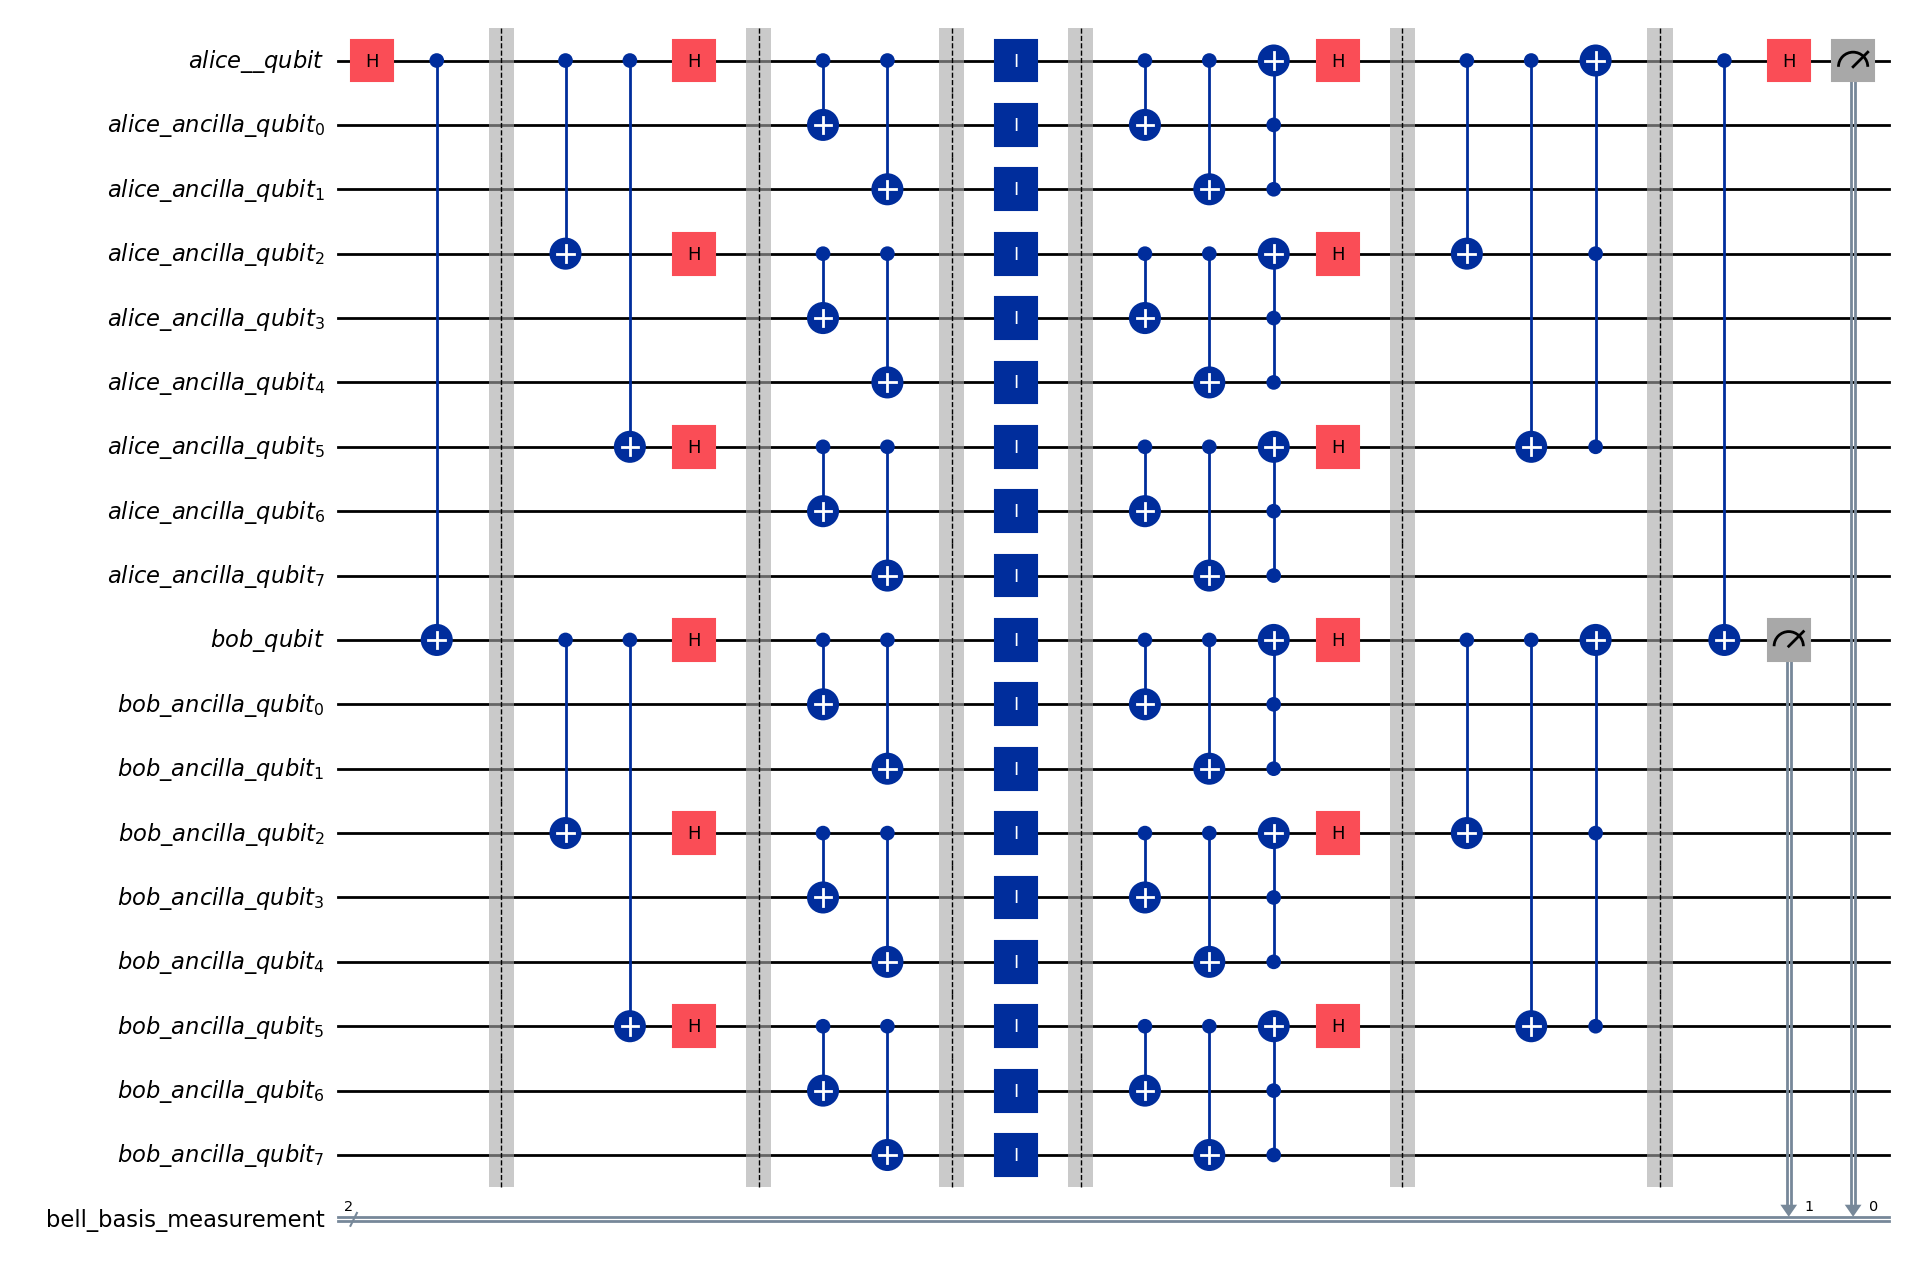

In [3]:
# 9 bit Shor on a bell state

cr = ClassicalRegister(2,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(8, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(8, 'bob_ancilla_qubit')

shor9 = QuantumCircuit(alice,aq1,bob,aq2,cr)

shor9.h(0)
shor9.cx(alice,bob)
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])

shor9.h([0,3,6,9,12,15])
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.barrier()

shor9.id(range(shor9.num_qubits))
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.mcx([1,2],0)
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.mcx([4,5],3)
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])
shor9.mcx([7,8],6)

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.mcx([10,11],9)
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.mcx([13,14],12)
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.mcx([16,17],15)

shor9.h([0,3,6,9,12,15])
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])
shor9.mcx([3,6],0)

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])
shor9.mcx([12,15],9)
shor9.barrier()

shor9.cx(alice,bob)
shor9.h(0)

shor9.measure([alice[0], bob[0]],cr)
shor9.draw(output='mpl')

In [4]:
shor9.draw(output='mpl').savefig("Shor 9 bit Code for Bell state.png",dpi=400,bbox_inches="tight")

In [11]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities = []

In [9]:
for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(shor9, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities.append(fidelity)

{'00': 300.0}
{'00': 300.0}
{'00': 299.8, '10': 0.2}
{'00': 299.0, '10': 0.5, '01': 0.5}
{'00': 297.4, '10': 2.1, '01': 0.5}
{'00': 293.3, '11': 0.1, '10': 4.4, '01': 2.2}
{'00': 283.5, '11': 0.4, '10': 12.0, '01': 4.1}
{'00': 273.6, '11': 1.1, '10': 18.7, '01': 6.6}
{'10': 23.6, '11': 2.1, '00': 262.1, '01': 12.2}
{'10': 37.0, '11': 3.6, '00': 242.2, '01': 17.2}
{'10': 47.8, '11': 6.5, '00': 223.5, '01': 22.2}
{'10': 58.9, '11': 14.0, '00': 202.2, '01': 24.9}
{'10': 69.7, '11': 19.7, '00': 173.3, '01': 37.3}
{'10': 80.7, '11': 25.7, '00': 152.9, '01': 40.7}
{'10': 77.8, '11': 37.9, '00': 132.8, '01': 51.5}
{'10': 86.5, '11': 46.8, '00': 112.1, '01': 54.6}
{'10': 80.9, '11': 54.5, '00': 102.9, '01': 61.7}
{'10': 77.3, '11': 61.9, '00': 94.3, '01': 66.5}
{'10': 76.4, '11': 66.7, '00': 82.2, '01': 74.7}
{'10': 74.0, '00': 81.3, '11': 69.0, '01': 75.7}
{'10': 75.7, '11': 69.3, '00': 81.6, '01': 73.4}
{'10': 78.1, '11': 74.1, '00': 72.6, '01': 75.2}
{'10': 74.5, '00': 76.1, '11': 78.2, '01

In [10]:
print(fidelities)

[1.0, 1.0, 0.9993333333333334, 0.9966666666666667, 0.9913333333333333, 0.9776666666666667, 0.945, 0.912, 0.8736666666666667, 0.8073333333333333, 0.745, 0.6739999999999999, 0.5776666666666667, 0.5096666666666667, 0.4426666666666667, 0.37366666666666665, 0.343, 0.3143333333333333, 0.274, 0.27099999999999996, 0.27199999999999996, 0.242, 0.25366666666666665, 0.25633333333333336, 0.24733333333333335, 0.251, 0.254, 0.26766666666666666, 0.24333333333333335, 0.26199999999999996]


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

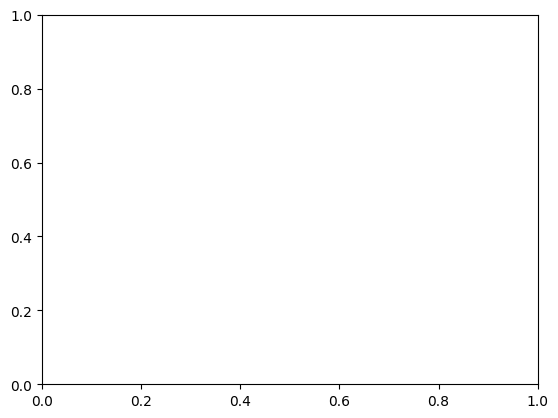

In [14]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 9 bit code for bell state')
grid()
legend()

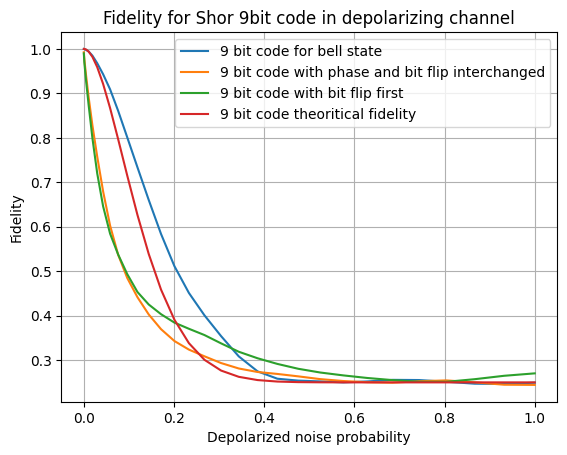

In [20]:
#fid1 = [1.0, 1.0, 0.998, 0.983, 0.946, 0.8916666666666666, 0.796, 0.6853333333333333, 0.582, 0.481, 0.3806666666666667, 0.328, 0.272, 0.25366666666666665, 0.25266666666666665, 0.25433333333333336, 0.257, 0.25033333333333335, 0.24, 0.2563333333333333]
#fid2 = [1.0, 0.97, 0.8996666666666666, 0.782, 0.6666666666666666, 0.5603333333333333, 0.4693333333333333, 0.39966666666666667, 0.35333333333333333, 0.316, 0.2986666666666667, 0.28, 0.257, 0.257, 0.24966666666666665, 0.24733333333333335, 0.24266666666666667, 0.252, 0.25466666666666665, 0.256]
#fid3 = [1.0, 0.97, 0.8786666666666666, 0.772, 0.6346666666666666, 0.539, 0.4713333333333333, 0.4356666666666667, 0.398, 0.3663333333333333, 0.349, 0.32566666666666666, 0.2966666666666667, 0.288, 0.267, 0.2586666666666667, 0.25466666666666665, 0.24333333333333335, 0.2566666666666667, 0.29233333333333333]

fid1 = [1.0, 1.0, 0.9993333333333334, 0.996, 0.99, 0.9726666666666667, 0.943, 0.922, 0.8646666666666666, 0.8043333333333333, 0.7376666666666667, 0.6616666666666666, 0.5856666666666667, 0.4976666666666667, 0.451, 0.393, 0.3646666666666667, 0.29433333333333334, 0.2683333333333333, 0.24866666666666665, 0.2543333333333333, 0.25733333333333336, 0.242, 0.25233333333333335, 0.26, 0.25566666666666665, 0.25366666666666665, 0.24366666666666664, 0.24233333333333335, 0.253]
fid2 = [1.0, 0.9856666666666666, 0.9523333333333333, 0.8979999999999999, 0.8266666666666667, 0.7686666666666666, 0.676, 0.5956666666666667, 0.5303333333333333, 0.4776666666666667, 0.44433333333333336, 0.39666666666666667, 0.36833333333333335, 0.33866666666666667, 0.318, 0.316, 0.2856666666666667, 0.28400000000000003, 0.26566666666666666, 0.27466666666666667, 0.26233333333333336, 0.25666666666666665, 0.2503333333333333, 0.254, 0.24133333333333334, 0.2553333333333333, 0.259, 0.25333333333333335, 0.23566666666666666, 0.24733333333333335]
fid3 = [1.0, 0.981, 0.9343333333333333, 0.8893333333333334, 0.8006666666666666, 0.7136666666666667, 0.6456666666666666, 0.5643333333333334, 0.5466666666666666, 0.4923333333333333, 0.4403333333333333, 0.425, 0.405, 0.37666666666666665, 0.37266666666666665, 0.36033333333333334, 0.3393333333333333, 0.31166666666666665, 0.30766666666666664, 0.28833333333333333, 0.2806666666666667, 0.2693333333333333, 0.26766666666666666, 0.25766666666666665, 0.2553333333333333, 0.25166666666666665, 0.24333333333333335, 0.2596666666666667, 0.264, 0.2743333333333333]

fid1 = gaussian_filter1d(fid1, sigma=1)
fid2 = gaussian_filter1d(fid2, sigma=1)
fid3 = gaussian_filter1d(fid3, sigma=1)
fid = 0.25 + 0.75*((1-noise_prob)**9 + 9*noise_prob*(1-noise_prob)**8)**2

plot(noise_prob,fid1, label="9 bit code for bell state")
plot(noise_prob,fid2, label="9 bit code with phase and bit flip interchanged")
plot(noise_prob,fid3, label="9 bit code with bit flip first")
plot(noise_prob,fid, label="9 bit code theoritical fidelity")

title("Fidelity for Shor 9bit code in depolarizing channel")
xlabel("Depolarized noise probability")
ylabel("Fidelity")
grid()
legend()
savefig("/kaggle/working/graph1.png",dpi=400,bbox_inches="tight")


[16 23 26]
Intersection points: [(0.32401902497027346, 0.336475597848085), (0.6569560047562426, 0.2536328136601602), (0.8353151010701546, 0.254309741753245)]


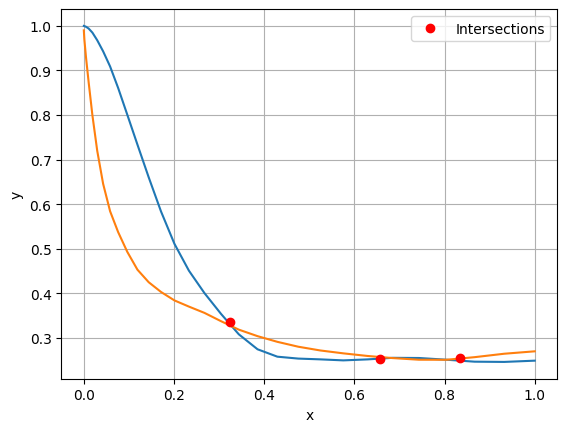

In [22]:
# Create an interpolation function for both curves
inter_fid1 = interp1d(noise_prob, fid1)
inter_fid3 = interp1d(noise_prob, fid3)

# Calculate the difference between the two functions
diff = fid1 - fid3

# Find where the sign of the difference changes (these are approximate intersection points)
sign_changes = np.where(np.diff(np.sign(diff)))[0]

# Refine intersection points by averaging the sign changes
x_intersections = (noise_prob[sign_changes] + noise_prob[sign_changes + 1]) / 2
y_intersections = (fid1[sign_changes] + fid3[sign_changes + 1]) / 2

# Plot the two curves
plot(noise_prob, fid1)
plot(noise_prob, fid3)

# Mark the intersection points
plot(x_intersections, y_intersections, 'ro', label='Intersections')

# Add labels and legend
xlabel('x')
ylabel('y')
grid()
legend()

print(f"Intersection points: {list(zip(x_intersections, y_intersections))}")

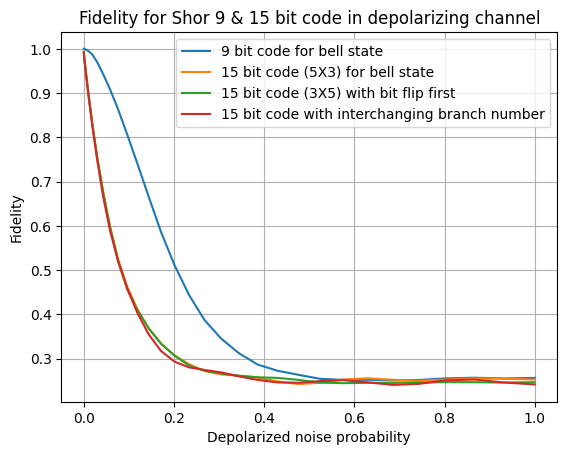

In [14]:
fid1 = [1.0, 1.0, 0.9993333333333334, 0.9966666666666667, 0.9913333333333333, 0.9776666666666667, 0.945, 0.912, 0.8736666666666667, 0.8073333333333333, 0.745, 0.6739999999999999, 0.5776666666666667, 0.5096666666666667, 0.4426666666666667, 0.37366666666666665, 0.343, 0.3143333333333333, 0.274, 0.27099999999999996, 0.27199999999999996, 0.242, 0.25366666666666665, 0.25633333333333336, 0.24733333333333335, 0.251, 0.254, 0.26766666666666666, 0.24333333333333335, 0.26199999999999996]
fid2 = [1.0, 0.9879999999999999, 0.9570000000000001, 0.9053333333333334, 0.8310000000000001, 0.757, 0.6826666666666668, 0.5960000000000001, 0.5136666666666666, 0.46166666666666667, 0.405, 0.367, 0.3293333333333333, 0.30433333333333334, 0.2876666666666667, 0.26699999999999996, 0.2603333333333333, 0.26366666666666666, 0.26199999999999996, 0.24800000000000003, 0.235, 0.242, 0.25866666666666666, 0.259, 0.2546666666666667, 0.24, 0.25833333333333336, 0.25666666666666665, 0.256, 0.25133333333333335]
fid3 = [1.0, 0.9873333333333333, 0.9576666666666667, 0.9006666666666666, 0.8363333333333334, 0.7533333333333333, 0.678, 0.595, 0.5153333333333333, 0.4396666666666667, 0.4156666666666667, 0.36300000000000004, 0.32566666666666666, 0.31333333333333335, 0.27066666666666667, 0.27466666666666667, 0.26366666666666666, 0.265, 0.25133333333333335, 0.26166666666666666, 0.25633333333333336, 0.23800000000000002, 0.245, 0.249, 0.24133333333333334, 0.249, 0.24533333333333332, 0.251, 0.241, 0.24933333333333332]
fid4 = [1.0, 0.9833333333333333, 0.9510000000000001, 0.8986666666666667, 0.83, 0.754, 0.6606666666666666, 0.5836666666666667, 0.5186666666666666, 0.45366666666666666, 0.4013333333333334, 0.35, 0.308, 0.2896666666666667, 0.27566666666666667, 0.2733333333333333, 0.2773333333333333, 0.253, 0.25633333333333336, 0.24066666666666667, 0.24333333333333335, 0.24933333333333332, 0.25833333333333336, 0.24933333333333332, 0.23233333333333334, 0.23866666666666664, 0.2553333333333333, 0.26466666666666666, 0.23766666666666666, 0.24166666666666667]

fid1 = gaussian_filter1d(fid1, sigma=1)
fid2 = gaussian_filter1d(fid2, sigma=1)
fid3 = gaussian_filter1d(fid3, sigma=1)
fid4 = gaussian_filter1d(fid4, sigma=1)

plot(noise_prob,fid1, label="9 bit code for bell state")
plot(noise_prob,fid2, label="15 bit code (5X3) for bell state")
plot(noise_prob,fid3, label="15 bit code (3X5) with bit flip first")
plot(noise_prob,fid4, label="15 bit code with interchanging branch number")

title("Fidelity for Shor 9 & 15 bit code in depolarizing channel")
xlabel("Depolarized noise probability")
ylabel("Fidelity")
grid()
legend()
savefig("/kaggle/working/graph2.png",dpi=400,bbox_inches="tight")

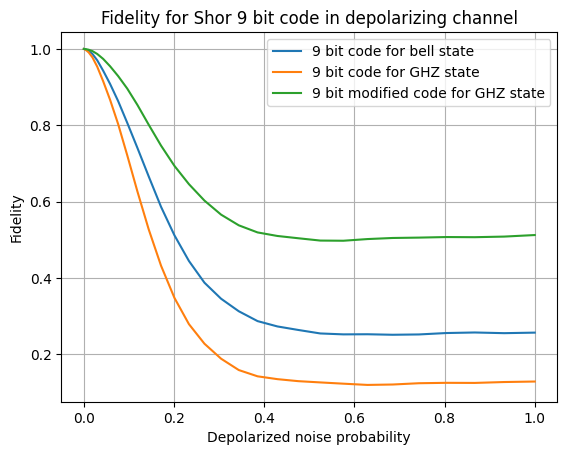

In [19]:
#fid1 = [1.0, 1.0, 1.0, 0.9983333333333333, 0.9961666666666668, 0.9906666666666666, 0.9825, 0.97, 0.9504999999999999, 0.9233333333333333, 0.8961666666666668, 0.866, 0.8256666666666667, 0.7839999999999999, 0.7418333333333333, 0.6918333333333334, 0.6598333333333333, 0.6148333333333333, 0.5860000000000001, 0.5545, 0.5356666666666666, 0.5346666666666667, 0.5005000000000001, 0.49816666666666665, 0.5103333333333333, 0.49350000000000005, 0.5008333333333334, 0.4953333333333333, 0.49566666666666664, 0.47350000000000003]
fid2 = [1.0, 1.0, 0.9993333333333334, 0.9966666666666667, 0.9913333333333333, 0.9776666666666667, 0.945, 0.912, 0.8736666666666667, 0.8073333333333333, 0.745, 0.6739999999999999, 0.5776666666666667, 0.5096666666666667, 0.4426666666666667, 0.37366666666666665, 0.343, 0.3143333333333333, 0.274, 0.27099999999999996, 0.27199999999999996, 0.242, 0.25366666666666665, 0.25633333333333336, 0.24733333333333335, 0.251, 0.254, 0.26766666666666666, 0.24333333333333335, 0.26199999999999996]
fid3 = [1.0, 0.9997777777777778, 0.9986666666666667, 0.9937777777777778, 0.9842222222222222, 0.9622222222222223, 0.9191111111111112, 0.8722222222222222, 0.8168888888888889, 0.7266666666666667, 0.6286666666666666, 0.5253333333333333, 0.42577777777777776, 0.3408888888888889, 0.26755555555555555, 0.22155555555555556, 0.18866666666666668, 0.1468888888888889, 0.13755555555555554, 0.13777777777777778, 0.1257777777777778, 0.12666666666666668, 0.12666666666666668, 0.11288888888888889, 0.12133333333333333, 0.12444444444444445, 0.1308888888888889, 0.11599999999999999, 0.13355555555555557, 0.12755555555555556]
#fid4 = [1.0, 1.0, 1.0, 0.9982222222222221, 0.9951111111111112, 0.991111111111111, 0.9786666666666668, 0.9577777777777777, 0.9326666666666668, 0.9037777777777778, 0.8655555555555556, 0.8119999999999999, 0.760888888888889, 0.6944444444444445, 0.6637777777777778, 0.5906666666666667, 0.5553333333333333, 0.532, 0.5095555555555555, 0.5126666666666667, 0.5017777777777778, 0.4924444444444444, 0.4975555555555556, 0.5028888888888889, 0.5006666666666666, 0.49177777777777776, 0.4968888888888889, 0.48911111111111105, 0.5008888888888889, 0.5024444444444444]
fid4 = [1.0, 1.0, 0.9997777777777778, 0.9984444444444446, 0.9968888888888888, 0.9886666666666667, 0.9784444444444446, 0.9571111111111111, 0.9315555555555555, 0.9017777777777779, 0.8602222222222222, 0.7997777777777778, 0.7493333333333334, 0.6862222222222223, 0.6468888888888888, 0.5986666666666667, 0.5602222222222222, 0.5351111111111111, 0.5117777777777778, 0.5077777777777778, 0.51, 0.49, 0.4951111111111111, 0.5031111111111112, 0.5095555555555555, 0.4984444444444444, 0.5153333333333333, 0.5022222222222222, 0.5051111111111111, 0.5166666666666667]

#fid1 = gaussian_filter1d(fid1, sigma=1)
fid2 = gaussian_filter1d(fid2, sigma=1)
fid3 = gaussian_filter1d(fid3, sigma=1)
fid4 = gaussian_filter1d(fid4, sigma=1)

#plot(noise_prob,fid1, label="9 bit code for single state")
plot(noise_prob,fid2, label="9 bit code for bell state")
plot(noise_prob,fid3, label="9 bit code for GHZ state")
plot(noise_prob,fid4, label="9 bit modified code for GHZ state")

title("Fidelity for Shor 9 bit code in depolarizing channel")
xlabel("Depolarized noise probability")
ylabel("Fidelity")
grid()
legend()
savefig("/kaggle/working/graph3.png",dpi=400,bbox_inches="tight")